# Course:  Convolutional Neural Networks for Image Classification

## Section-8
### Manipulate images by geometric transformations

**Description:**  
*Generate additional images by rotation and projection  
Plot resulted images*  

**File:** *geometric_transformations.ipynb*

### Algorithm:

**--> Step 1:** Open Traffic Signs dataset  
**--> Step 2:** Apply rotation around centre point  
**--> Step 3:** Apply perspective transformations  
**--> Step 4:** Visualize examples  


**Result:**  
- Plot with images before and after geometric transformations

## Importing libraries

In [1]:
# Importing needed libraries
import matplotlib.pyplot as plt
import numpy as np
import h5py
import cv2


## Setting up full path

In [2]:
# Full or absolute path to 'Section3' with Traffic Signs dataset
# (!) On Windows, the path should look like following:
# r'C:\Users\your_name\PycharmProjects\CNNCourse\Section3'
# or:
# 'C:\\Users\\your_name\\PycharmProjects\\CNNCourse\\Section3'
full_path_to_Section3 = \
    'C:\\Users\\anaso\\OneDrive - Instituto Superior de Engenharia de Lisboa\\CNNCourse\\Section3'


## Step 1: Opening Traffic Signs dataset

In [3]:
# Opening saved Traffic Signs dataset from HDF5 binary file
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section3 + '/' + 'dataset_ts.hdf5', 'r') as f:
    # Extracting saved arrays for training by appropriate keys
    # Saving them into new variables
    x_train = f['x_train']  # HDF5 dataset
    y_train = f['y_train']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_train = np.array(x_train)  # Numpy arrays
    y_train = np.array(y_train)  # Numpy arrays


# Check point
print('Traffic Signs dataset is successfully opened')


Traffic Signs dataset is successfully opened


In [4]:
# Check point
# Showing shapes of loaded arrays
print(x_train.shape)
print(y_train.shape)


(36288, 48, 48, 3)
(36288,)


## Step 2: Applying rotation around centre point

In [5]:
# Defining function to rotate image around centre point
def rotation_changing(input_image):
    # Defining random angle for rotation (positive or negative)
    angle = np.random.randint(low=5, high=15) * np.random.choice([-1, 1])
    
    # Getting shape of input image
    height, width, channels = input_image.shape
    
    # Calculating coordinates (x, y) for centre point of input image
    centre_point = (int(width / 2), int(height / 2))
    
    # Calculating Affine Matrix
    affine_matrix = cv2.getRotationMatrix2D(centre_point, angle, scale=1)
    
    # Check point
    # Showing shape of calculated rotation matrix and its values
    print(affine_matrix.shape)  # (2, 3)
    print(affine_matrix)
    
    # Warping original image with Affine Matrix
    rotated_image = cv2.warpAffine(input_image, affine_matrix, (height, width))
    
    # Returning rotated image
    return rotated_image


# Check point
print('Function to randomly rotate image is successfully defined')


Function to randomly rotate image is successfully defined


(2, 3)
[[ 0.9945219  -0.10452846  2.64015763]
 [ 0.10452846  0.9945219  -2.37720861]]


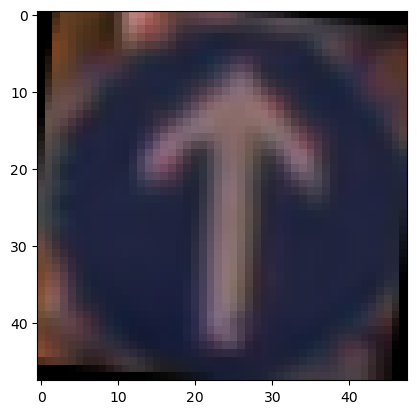

In [6]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline

plt.imshow(rotation_changing(x_train[6]).astype('uint8'))

# Showing the plot
plt.show()


## Step 3: Applying perspective transformation

In [7]:
# Defining function to project image
# by coordinates of quadrangle vertices
def perspective_changing_1(input_image):
    # Getting shape of input image
    height, width, channels = input_image.shape
    
    # Defining variables for vertices of input image
    x_min = 0
    y_min = 0
    x_max = width
    y_max = height
    
    # Prepering coordinates of quadrangle vertices
    # in the input image
    src = np.float32([[x_min, y_min],  # top-left
                      [x_max, y_min],  # top-right
                      [x_min, y_max],  # bottom-left
                      [x_max, y_max]]) # bottom-right
    
    # Preparing coordinates of corresponding quadrangle vertices
    # in the output image
    dst = np.float32([[x_min + 5, y_min + 5],  # top-left
                      [x_max - 5, y_min + 5],  # top-right
                      [x_min, y_max],          # bottom-left
                      [x_max, y_max]])         # bottom-right
    
    # Calculating perspective transformation matrix
    # from 4 pairs of the corresponding points
    matrix = cv2.getPerspectiveTransform(src, dst)
    
    # Check point
    # Showing shape of calculated perspective matrix and its values
    print(matrix.shape)  # (3, 3)
    print(matrix)
    
    # Applying perspective transformation
    # by found matrix to input image
    projected_image = cv2.warpPerspective(input_image, matrix, (height, width))
       
    # Returning projected image
    return projected_image


# Check point
print('First function to project image is successfully defined')


First function to project image is successfully defined


In [8]:
# Defining function to project image
# by coordinates of quadrangle vertices
def perspective_changing_2(input_image):
    # Getting shape of input image
    height, width, channels = input_image.shape
    
    # Defining variables for vertices of input image
    x_min = 0
    y_min = 0
    x_max = width
    y_max = height
    
    # Prepering coordinates of quadrangle vertices
    # in the input image
    src = np.float32([[x_min, y_min],  # top-left
                      [x_max, y_min],  # top-right
                      [x_min, y_max],  # bottom-left
                      [x_max, y_max]]) # bottom-right
    
    # Preparing coordinates of corresponding quadrangle vertices
    # in the output image
    dst = np.float32([[x_min, y_min],          # top-left
                      [x_max - 5, y_min + 5],  # top-right
                      [x_min, y_max],          # bottom-left
                      [x_max - 5, y_max - 5]]) # bottom-right
    
    # Calculating perspective transformation matrix
    # from 4 pairs of the corresponding points
    matrix = cv2.getPerspectiveTransform(src, dst)
    
    # Check point
    # Showing shape of calculated perspective matrix and its values
    print(matrix.shape)  # (3, 3)
    print(matrix)
    
    # Applying perspective transformation
    # by found matrix to input image
    projected_image = cv2.warpPerspective(input_image, matrix, (height, width))
    
    # Returning projected image
    return projected_image


# Check point
print('Second function to project image is successfully defined')


Second function to project image is successfully defined


(3, 3)
[[ 1.13157895  0.          0.        ]
 [ 0.13157895  1.          0.        ]
 [ 0.00548246 -0.          1.        ]]


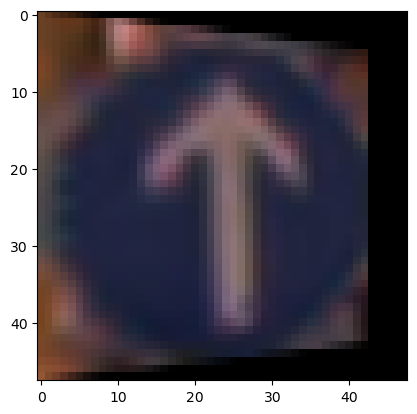

In [9]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline

plt.imshow(perspective_changing_2(x_train[6]).astype('uint8'))

# Showing the plot
plt.show()


## Step 4: Visualizing examples

In [10]:
# Defining list to collect new images
x_temp_rotation = []
x_temp_perspective_1 = []
x_temp_perspective_2 = []


# Iterating first 15 images from loaded dataset
# Applying functions for geometric transformations
# Adding results into the lists
for i in range(15):
    x_temp_rotation.append(rotation_changing(x_train[i]))
    x_temp_perspective_1.append(perspective_changing_1(x_train[i]))
    x_temp_perspective_2.append(perspective_changing_2(x_train[i]))


# Converting lists into Numpy arrays
x_temp_rotation = np.array(x_temp_rotation)            # Numpy array
x_temp_perspective_1 = np.array(x_temp_perspective_1)  # Numpy array
x_temp_perspective_2 = np.array(x_temp_perspective_2)  # Numpy array


# Check point
print('Geometric transformations of the first 15 images are successfully applied')


(2, 3)
[[ 0.98480775 -0.17364818  4.53217019]
 [ 0.17364818  0.98480775 -3.80294234]]
(3, 3)
[[ 7.91666667e-01 -1.04166667e-01  5.00000000e+00]
 [ 0.00000000e+00  6.87500000e-01  5.00000000e+00]
 [-0.00000000e+00 -4.34027778e-03  1.00000000e+00]]
(3, 3)
[[ 1.13157895  0.          0.        ]
 [ 0.13157895  1.          0.        ]
 [ 0.00548246 -0.          1.        ]]
(2, 3)
[[ 0.97437006  0.22495105 -4.78370686]
 [-0.22495105  0.97437006  6.01394375]]
(3, 3)
[[ 7.91666667e-01 -1.04166667e-01  5.00000000e+00]
 [ 0.00000000e+00  6.87500000e-01  5.00000000e+00]
 [-0.00000000e+00 -4.34027778e-03  1.00000000e+00]]
(3, 3)
[[ 1.13157895  0.          0.        ]
 [ 0.13157895  1.          0.        ]
 [ 0.00548246 -0.          1.        ]]
(2, 3)
[[ 0.9945219   0.10452846 -2.37720861]
 [-0.10452846  0.9945219   2.64015763]]
(3, 3)
[[ 7.91666667e-01 -1.04166667e-01  5.00000000e+00]
 [ 0.00000000e+00  6.87500000e-01  5.00000000e+00]
 [-0.00000000e+00 -4.34027778e-03  1.00000000e+00]]
(3, 3)
[[

In [11]:
# Check points
# Showing some pixels' values before and after geometric transformations
print('Original pixels values:')
print(x_train[0, 24, :10, 0].astype('uint8'))
print()
print('After rotation')
print(x_temp_rotation[0, 24, :10, 0].astype('uint8'))
print()
print('After projection 1')
print(x_temp_perspective_1[0, 24, :10, 0].astype('uint8'))
print()
print('After projection 2')
print(x_temp_perspective_2[0, 24, :10, 0].astype('uint8'))


Original pixels values:
[36 39 45 57 69 82 88 84 77 90]

After rotation
[43 44 50 64 77 86 88 84 81 95]

After projection 1
[ 0  0  3 36 41 51 64 78 87 83]

After projection 2
[36 38 43 53 64 75 84 86 81 81]


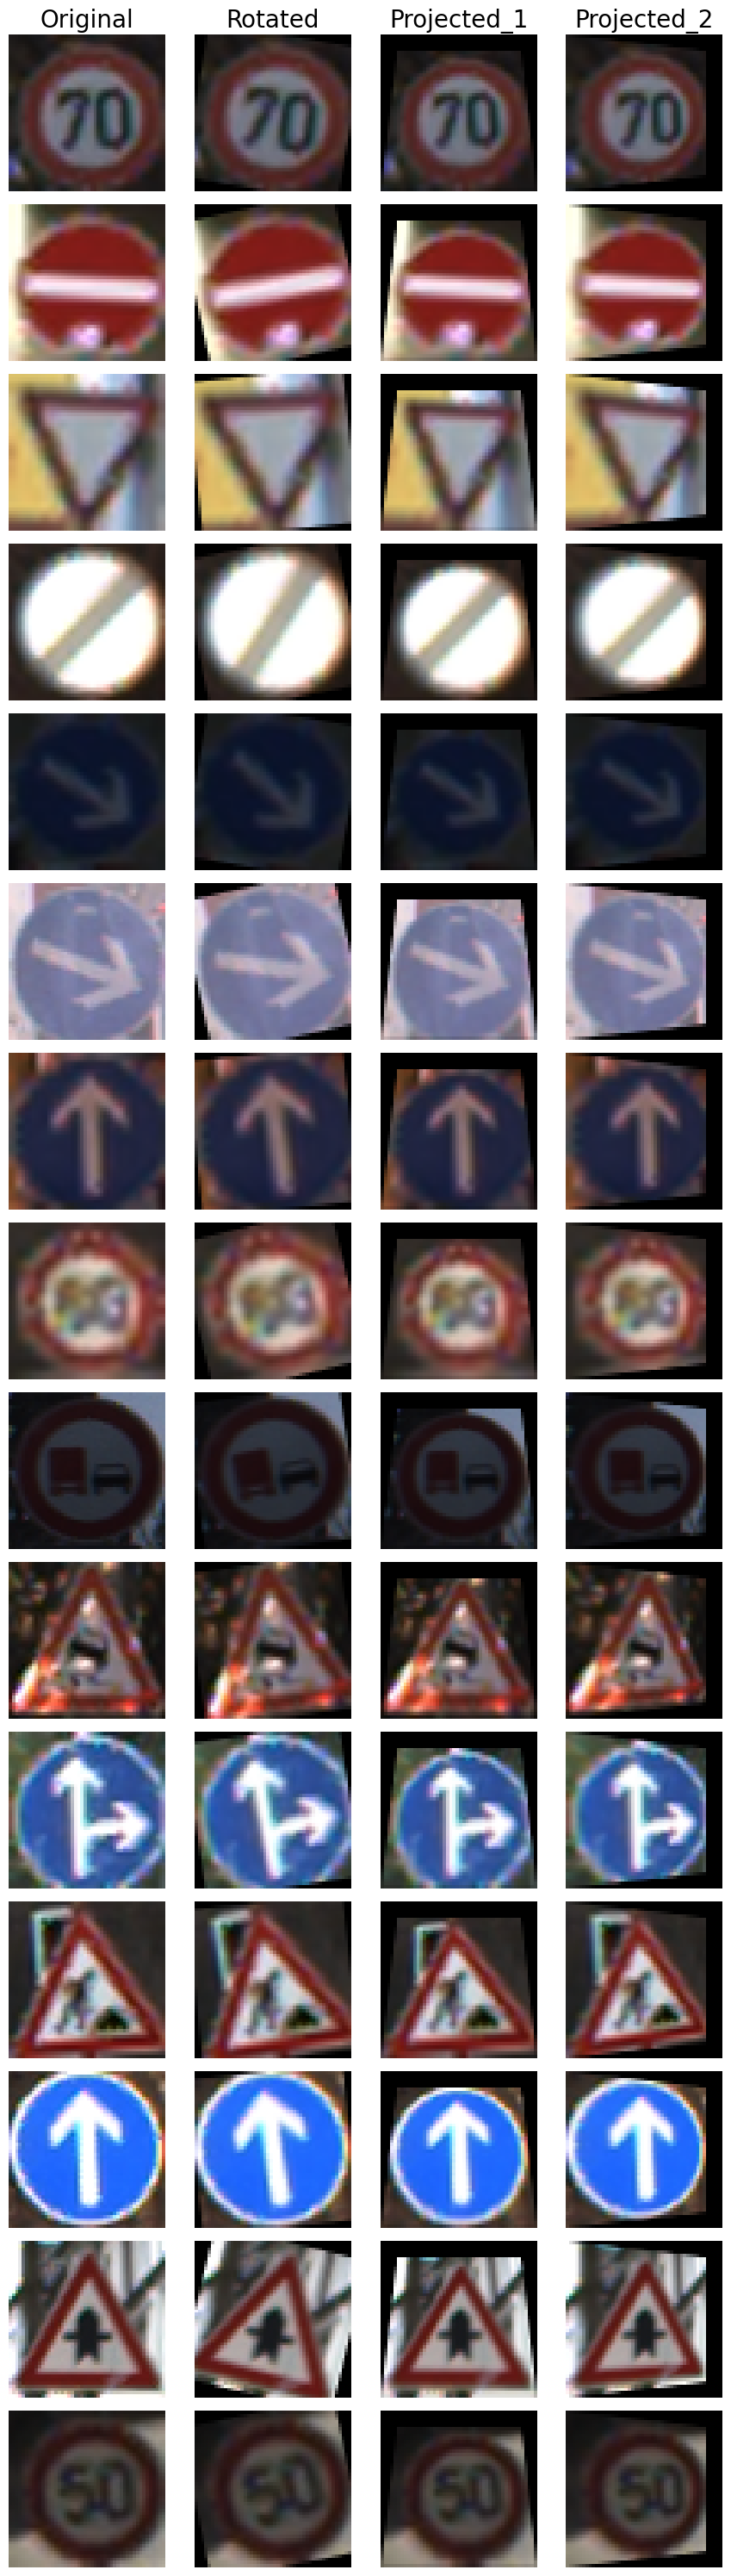

In [12]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (9.0, 30.0)


# Defining a figure object with number of needed subplots
# ax is a (15, 4) Numpy array
# To access specific subplot we call it by ax[0, 0]
figure, ax = plt.subplots(nrows=15, ncols=4)


# Plotting 60 examples along 15 rows and 4 columns
for i in range(15):
    # Plotting original images in the first column
    ax[i, 0].imshow(x_train[i].astype('uint8'))
    
    # Plotting rotated images in the second column
    ax[i, 1].imshow(x_temp_rotation[i].astype('uint8'))
    
    # Plotting projected images in the third column
    ax[i, 2].imshow(x_temp_perspective_1[i].astype('uint8'))
    
    # Plotting projected images in the fourth column
    ax[i, 3].imshow(x_temp_perspective_2[i].astype('uint8'))
    
    # Hiding axes
    ax[i, 0].axis('off')
    ax[i, 1].axis('off')
    ax[i, 2].axis('off')
    ax[i, 3].axis('off')


# Giving names to columns
ax[0, 0].set_title('Original', fontsize=20)
ax[0, 1].set_title('Rotated', fontsize=20)
ax[0, 2].set_title('Projected_1', fontsize=20)
ax[0, 3].set_title('Projected_2', fontsize=20)


# Adjusting distance between subplots
plt.tight_layout()


# Showing the plot
plt.show()


### Some comments

To get more details for usage of 'cv2.getRotationMatrix2D':  
**print(help(cv2.getRotationMatrix2D))**
  
More details and examples are here:  
 - https://docs.opencv.org/4.5.0/da/d54/group__imgproc__transform.html  


To get more details for usage of 'cv2.warpAffine':  
**print(help(cv2.warpAffine))**
  
More details and examples are here:  
 - https://docs.opencv.org/4.5.0/da/d54/group__imgproc__transform.html  


To get more details for usage of 'cv2.getPerspectiveTransform':  
**print(help(cv2.getPerspectiveTransform))**
  
More details and examples are here:  
 - https://docs.opencv.org/4.5.0/da/d54/group__imgproc__transform.html  


To get more details for usage of 'cv2.warpPerspective':  
**print(help(cv2.warpPerspective))**
  
More details and examples are here:  
 - https://docs.opencv.org/4.5.0/da/d54/group__imgproc__transform.html  


In [13]:
print(help(cv2.getRotationMatrix2D))

Help on built-in function getRotationMatrix2D:

getRotationMatrix2D(...)
    getRotationMatrix2D(center, angle, scale) -> retval
    .   @brief Calculates an affine matrix of 2D rotation.
    .   
    .   The function calculates the following matrix:
    .   
    .   \f[\begin{bmatrix} \alpha &  \beta & (1- \alpha )  \cdot \texttt{center.x} -  \beta \cdot \texttt{center.y} \\ - \beta &  \alpha &  \beta \cdot \texttt{center.x} + (1- \alpha )  \cdot \texttt{center.y} \end{bmatrix}\f]
    .   
    .   where
    .   
    .   \f[\begin{array}{l} \alpha =  \texttt{scale} \cdot \cos \texttt{angle} , \\ \beta =  \texttt{scale} \cdot \sin \texttt{angle} \end{array}\f]
    .   
    .   The transformation maps the rotation center to itself. If this is not the target, adjust the shift.
    .   
    .   @param center Center of the rotation in the source image.
    .   @param angle Rotation angle in degrees. Positive values mean counter-clockwise rotation (the
    .   coordinate origin is assumed to

In [14]:
print(help(cv2.warpAffine))

Help on built-in function warpAffine:

warpAffine(...)
    warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
    .   @brief Applies an affine transformation to an image.
    .   
    .   The function warpAffine transforms the source image using the specified matrix:
    .   
    .   \f[\texttt{dst} (x,y) =  \texttt{src} ( \texttt{M} _{11} x +  \texttt{M} _{12} y +  \texttt{M} _{13}, \texttt{M} _{21} x +  \texttt{M} _{22} y +  \texttt{M} _{23})\f]
    .   
    .   when the flag #WARP_INVERSE_MAP is set. Otherwise, the transformation is first inverted
    .   with #invertAffineTransform and then put in the formula above instead of M. The function cannot
    .   operate in-place.
    .   
    .   @param src input image.
    .   @param dst output image that has the size dsize and the same type as src .
    .   @param M \f$2\times 3\f$ transformation matrix.
    .   @param dsize size of the output image.
    .   @param flags combination of interpolation methods (

In [15]:
print(help(cv2.getPerspectiveTransform))

Help on built-in function getPerspectiveTransform:

getPerspectiveTransform(...)
    getPerspectiveTransform(src, dst[, solveMethod]) -> retval
    .   @brief Calculates a perspective transform from four pairs of the corresponding points.
    .   
    .   The function calculates the \f$3 \times 3\f$ matrix of a perspective transform so that:
    .   
    .   \f[\begin{bmatrix} t_i x'_i \\ t_i y'_i \\ t_i \end{bmatrix} = \texttt{map_matrix} \cdot \begin{bmatrix} x_i \\ y_i \\ 1 \end{bmatrix}\f]
    .   
    .   where
    .   
    .   \f[dst(i)=(x'_i,y'_i), src(i)=(x_i, y_i), i=0,1,2,3\f]
    .   
    .   @param src Coordinates of quadrangle vertices in the source image.
    .   @param dst Coordinates of the corresponding quadrangle vertices in the destination image.
    .   @param solveMethod method passed to cv::solve (#DecompTypes)
    .   
    .   @sa  findHomography, warpPerspective, perspectiveTransform

None


In [16]:
print(help(cv2.warpPerspective))

Help on built-in function warpPerspective:

warpPerspective(...)
    warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
    .   @brief Applies a perspective transformation to an image.
    .   
    .   The function warpPerspective transforms the source image using the specified matrix:
    .   
    .   \f[\texttt{dst} (x,y) =  \texttt{src} \left ( \frac{M_{11} x + M_{12} y + M_{13}}{M_{31} x + M_{32} y + M_{33}} ,
    .        \frac{M_{21} x + M_{22} y + M_{23}}{M_{31} x + M_{32} y + M_{33}} \right )\f]
    .   
    .   when the flag #WARP_INVERSE_MAP is set. Otherwise, the transformation is first inverted with invert
    .   and then put in the formula above instead of M. The function cannot operate in-place.
    .   
    .   @param src input image.
    .   @param dst output image that has the size dsize and the same type as src .
    .   @param M \f$3\times 3\f$ transformation matrix.
    .   @param dsize size of the output image.
    .   @param flags 